In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision 
import matplotlib.pyplot as plt

import numpy as np 

In [ ]:
#from sklearn.datasets import fetch_openml
#emnist = fetch_openml('EMNIST_letters')
# X, y = emnist['data'], emnist['target']
# X = np.array(X)
# y = np.array(y)
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [2]:
# EMNIST 手写字母 训练集
train_data = torchvision.datasets.EMNIST(
    root='./data',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download = False,
    split = 'letters' 
)
# EMNIST 手写字母 测试集
test_data = torchvision.datasets.EMNIST(
    root='./data',
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=False,
    split = 'letters'     
)

In [19]:
type(train_data.data)

torch.Tensor

In [3]:
X_train = train_data.data.numpy()
y_train = train_data.targets.numpy()
X_test = test_data.data.numpy()
y_test = test_data.targets.numpy()

In [20]:
type(X_train)

numpy.ndarray

In [18]:
X_train.shape

(124800, 28, 28)

In [4]:
X_train_2D = (X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test_2D = (X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2]))


In [40]:
X_train_2D.shape

(124800, 784)

In [5]:
from sklearn.decomposition import PCA 
pca = PCA(0.90) # 数据量较大，因此只保存90%的信息
pca.fit(X_train_2D)

# 采用训练好的pca将训练和测试数据集降维
X_train_reduction = pca.transform(X_train_2D)
X_test_reduction = pca.transform(X_test_2D)

In [6]:
X_train_reduction.shape

(124800, 68)

# 使用KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

KNeighborsClassifier()

In [8]:
knn_clf.score(X_test_reduction, y_test)

0.8800961538461538

### 学习曲线函数

In [13]:
from sklearn.metrics import mean_squared_error

def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(5, len(X_train)+1,1000):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(5, len(X_train)+1,1000)], 
                               np.sqrt(train_score), label="train")
    plt.plot([i for i in range(5, len(X_train)+1,1000)], 
                               np.sqrt(test_score), label="test")
    plt.legend()
    #plt.axis([0, len(X_train)+1],0,20)
    plt.show()

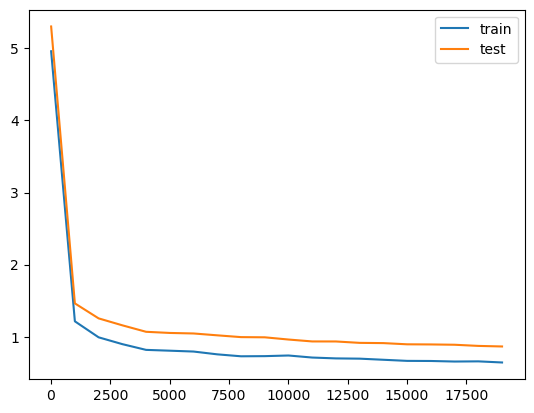

In [14]:
from sklearn.neighbors import KNeighborsClassifier

plot_learning_curve(KNeighborsClassifier(n_jobs = -1), X_train_reduction[:20000], X_test_reduction[:20000], y_train[:20000], y_test[:20000])

# 随机森林

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1)
rf_clf.fit(X_train_reduction, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, oob_score=True)

In [45]:
rf_clf.score(X_test_reduction, y_test)
#rf_clf.oob_score_

0.8644711538461538

### 学习率曲线

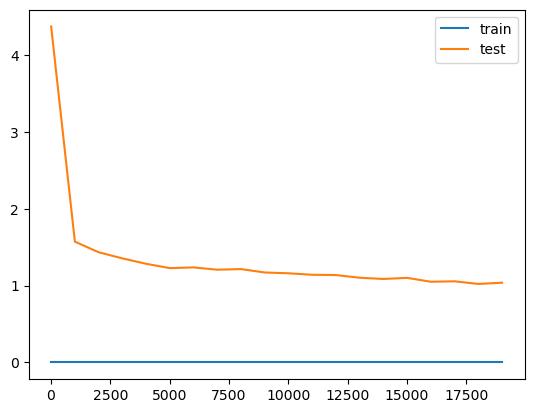

In [18]:
from sklearn.ensemble import RandomForestClassifier

plot_learning_curve(RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1), X_train_reduction[:20000], X_test_reduction[:20000], y_train[:20000], y_test[:20000])

In [10]:
import os
from PIL import Image
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# this function is for read image,the input is directory name
def read_directory(directory_name):
    # this loop is for read each image in this foder,directory_name is the foder name with images.
    file=open('E:/MyProject/digits/data.txt','w') 
    for filename in os.listdir(directory_name):
        #img is used to store the image data 
        img = Image.open(directory_name + "/" + filename)
        img = img.convert('L')  # 灰度化
        img_array = np.array(img)
        X_temp = np.array((255-img_array), dtype=float)
    
        print(filename)
        file.write(str(X_temp)); 
    file.close()

read_directory("E:/MyProject/digits/img2")

A.jpg
B.jpg
C.jpg
D.jpg
E.jpg
F.jpg
G.jpg
H.jpg
I.jpg
J.jpg
K.jpg
L.jpg
M.jpg


In [11]:
import re

# 打开文件
f = open('E:/MyProject/digits/data.txt','r')
fs = f.readlines()
s = fs
f.close()

# 正则过滤非数字
for i in range(len(s)):
        s[i] = re.sub(r'\D', " ", s[i])
           
# 将 s 按空格拆分存到 spl 中   
sp = []
spl = [] 
for i in range(len(s)):
    sp = s[i].split()
    for j in range(len(sp)):
         spl.append(sp[j])
                   
arr= []
arr2 = []

# 按每784个一组，将spl中的数据存到arr2中
for l in range(int(len(spl)/784)):
    for i in range(784*l,784*(l+1)):
        arr.append(spl[i])
    
    arr2.append(arr)
    arr = []
    
# 将 arr2 转换为数组存入arr3
arr3=np.asarray(arr2)

In [12]:
# 将待预测值用训练好的pca降维
X_test = pca.transform(arr3)

### 随机森林预测

In [49]:
y_predict = rf_clf.predict(X_test)
y_predict

array([ 1,  1,  3,  4,  5,  6, 17, 25, 20, 20,  8, 12, 13], dtype=int64)

In [50]:
y_predict_chr = [chr(64+int(i)) for i in y_predict]
y_predict_chr

['A', 'A', 'C', 'D', 'E', 'F', 'Q', 'Y', 'T', 'T', 'H', 'L', 'M']

### KNN预测

In [13]:
y_predict = knn_clf.predict(X_test)
y_predict

array([17,  7,  3,  4,  6,  6,  7, 20, 12,  9, 11, 12, 13], dtype=int64)

In [14]:
y_predict_chr = [chr(64+i) for i in y_predict]
y_predict_chr

['Q', 'G', 'C', 'D', 'F', 'F', 'G', 'T', 'L', 'I', 'K', 'L', 'M']

# 处理图片以更好预测

### 处理图片尺寸

### 镜像翻转后逆时针旋转90度

In [22]:
import sys
import cv2
import os
from PIL import Image
from PIL import ImageDraw


path = 'E:\MyProject\digits\img2'
print(path)
im_file = os.listdir(path)

for im_file_index_i in im_file:

    path = 'E:\MyProject\digits\img2'
    im_test = os.path.join(path, im_file_index_i)
    print(im_test)
    img1 = Image.open(im_test)

    #out = Image.open(im_test)
    out = img1.resize((28,28)) #尺寸处理
    out1 = out.transpose(Image.FLIP_LEFT_RIGHT)  # 水平翻转
    out3 = out1.rotate(90)                            #45°顺时针翻转


    name2 = 'E:/MyProject/digits/img2//' + im_file_index_i
    out3.save(name2)

E:\MyProject\digits\img2
E:\MyProject\digits\img2\A.jpg
E:\MyProject\digits\img2\B.jpg
E:\MyProject\digits\img2\C.jpg
E:\MyProject\digits\img2\D.jpg
E:\MyProject\digits\img2\E.jpg
E:\MyProject\digits\img2\F.jpg
E:\MyProject\digits\img2\G.jpg
E:\MyProject\digits\img2\H.jpg
E:\MyProject\digits\img2\I.jpg
E:\MyProject\digits\img2\J.jpg
E:\MyProject\digits\img2\K.jpg
E:\MyProject\digits\img2\L.jpg
E:\MyProject\digits\img2\M.jpg


C:\Users\86189\AppData\Local\Temp\ipykernel_27556\1765670956.py:25: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  out1 = out.transpose(Image.FLIP_LEFT_RIGHT)  # 水平翻转


In [16]:
ch = np.array(y_train,dtype= int)
g=np.argwhere(ch==1)
print (g[4])

[59]


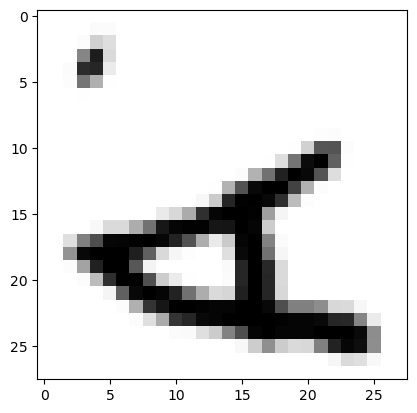

In [17]:
import matplotlib

temp = np.array(X_train_2D[59], dtype=float)
some_digit = temp
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
plt.show()